### Using entropy to find the best split

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


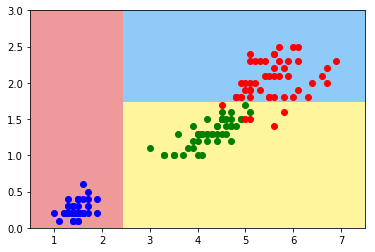

In [10]:
plot_decision_boundary(dt_clf, axis = [0.5,7.5,0,3])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.scatter(X[y == 2, 0],X[y == 2, 1],color = 'r')
plt.show()

### Decision Tree 对数据非常敏感
1. 删除一个样本：一行元素

In [11]:
X_new = np.delete(X, 138, axis = 0)
y_new = np.delete(y, 138) #因为只有一个维度，所以axis默认是0

In [12]:
print(X_new.shape)
print(y_new.shape)

(149, 2)
(149,)


/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


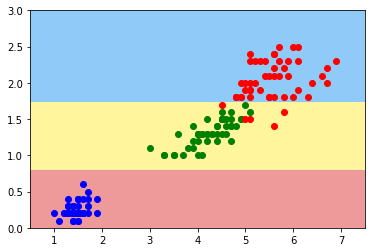

In [15]:
dt_clf2 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_clf2.fit(X_new, y_new)
plot_decision_boundary(dt_clf2, axis = [0.5,7.5,0,3])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.scatter(X[y == 2, 0],X[y == 2, 1],color = 'r')
plt.show()

### 主要用处：
1. 虽然有局限性，但是依旧应用广泛
2. 一般我们很少单独使用一棵决策树，（经济学领域会只是用一颗）更多情况下我们会用随机森林